In [342]:
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [343]:
print(device)

cuda:0


In [344]:
from trained_model_experiments_util import *

In [345]:
# resnet18, vit_small_patch32_224
learn = create_learner("vit_small_patch32_224", augment=False, test_set=True)

In [346]:
# Print size of train and validation sets
print(len(learn.dls.train_ds))
print(len(learn.dls.valid_ds))

# Print vocab
print(learn.dls.train_ds.vocab)
print(len(learn.dls.train_ds.vocab))

1001
99012
['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
50


In [347]:
learn = load_wandb_model(16, learn)
# learn = load_local_model("vit_final/model_epoch_4.pth", learn)

wandb: Downloading large artifact model:v16, 86.72MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:16.0


In [348]:
preds, targs = get_predictions(learn)

In [349]:
print(preds.shape)

torch.Size([99012, 50])


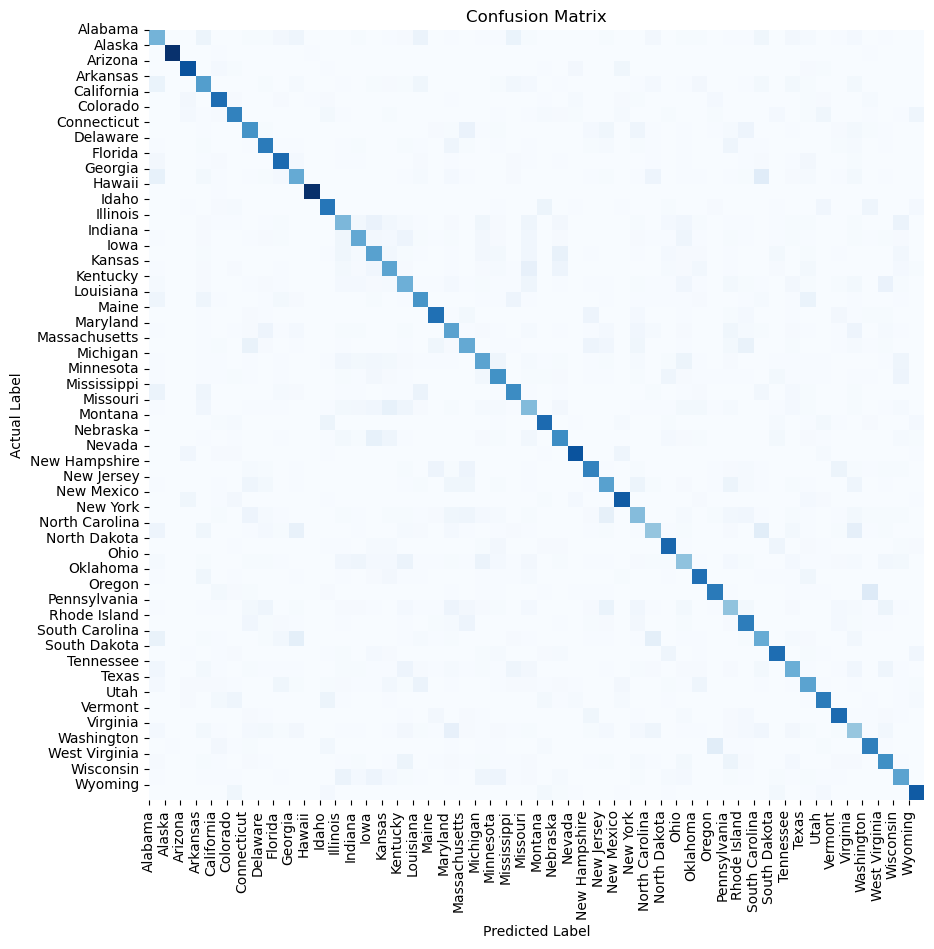

In [350]:
states = learn.dls.vocab
cm=display_confusion_matrix(preds, targs, states)

In [351]:
get_most_confused(cm, states)

[('Oregon', 'Washington', 250),
 ('Georgia', 'South Carolina', 223),
 ('Washington', 'Oregon', 218),
 ('North Carolina', 'South Carolina', 214),
 ('South Carolina', 'North Carolina', 183),
 ('South Carolina', 'Georgia', 181),
 ('North Carolina', 'Virginia', 178),
 ('New York', 'New Jersey', 173),
 ('Virginia', 'Maryland', 162),
 ('Kansas', 'Missouri', 161),
 ('Missouri', 'Kansas', 156),
 ('Georgia', 'Alabama', 155),
 ('Nebraska', 'Iowa', 152),
 ('Iowa', 'Nebraska', 145),
 ('North Carolina', 'Georgia', 144),
 ('Massachusetts', 'Connecticut', 141),
 ('Massachusetts', 'Rhode Island', 140),
 ('South Carolina', 'Alabama', 136),
 ('Illinois', 'Iowa', 135),
 ('Connecticut', 'Massachusetts', 132),
 ('Kentucky', 'West Virginia', 129),
 ('Arkansas', 'Alabama', 128),
 ('Louisiana', 'Texas', 124),
 ('Pennsylvania', 'New Jersey', 124),
 ('Alabama', 'Mississippi', 122),
 ('Mississippi', 'Alabama', 120),
 ('Ohio', 'Kentucky', 120),
 ('Mississippi', 'Louisiana', 116),
 ('Texas', 'Louisiana', 116),
 ('

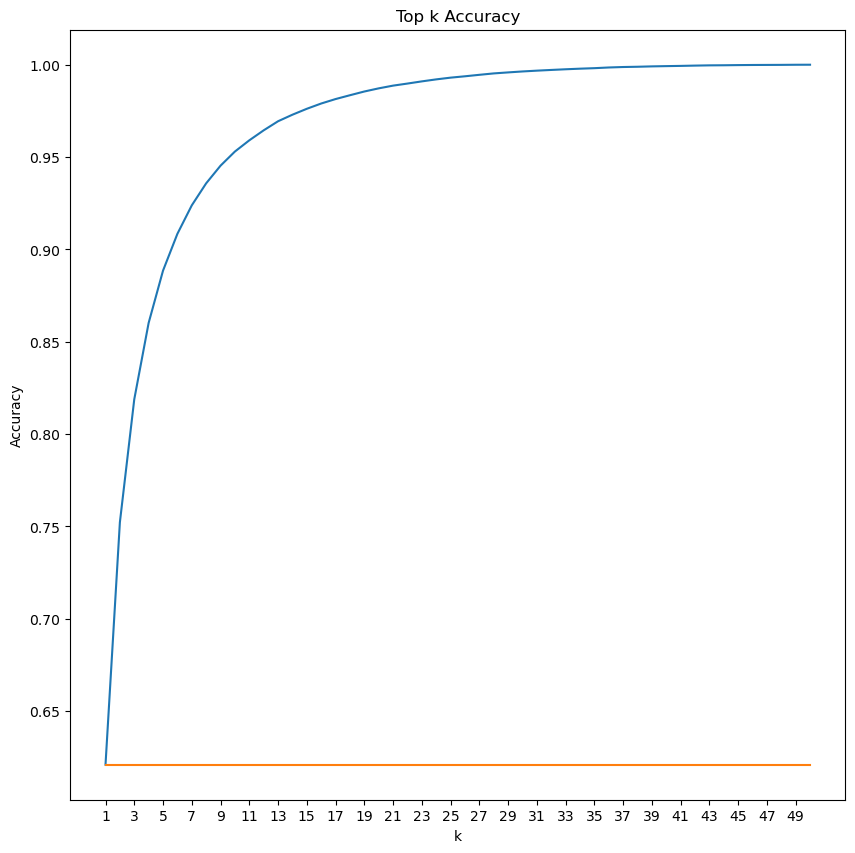

In [352]:
top_accs = plot_top_k_accuracy(preds, targs)

In [365]:
top_accs[0]

(0.6209449359673574, 0.6209550357532421)

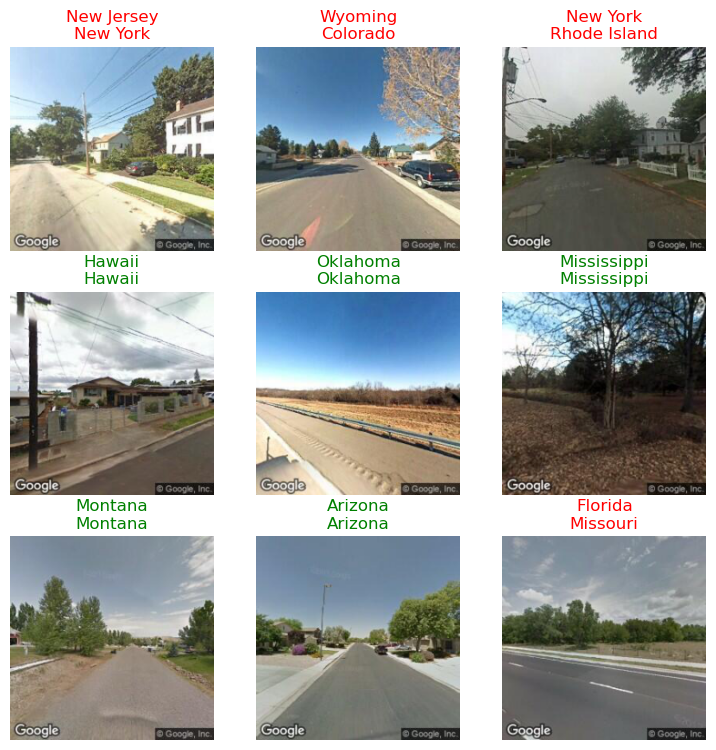

In [367]:
learn.show_results(1)

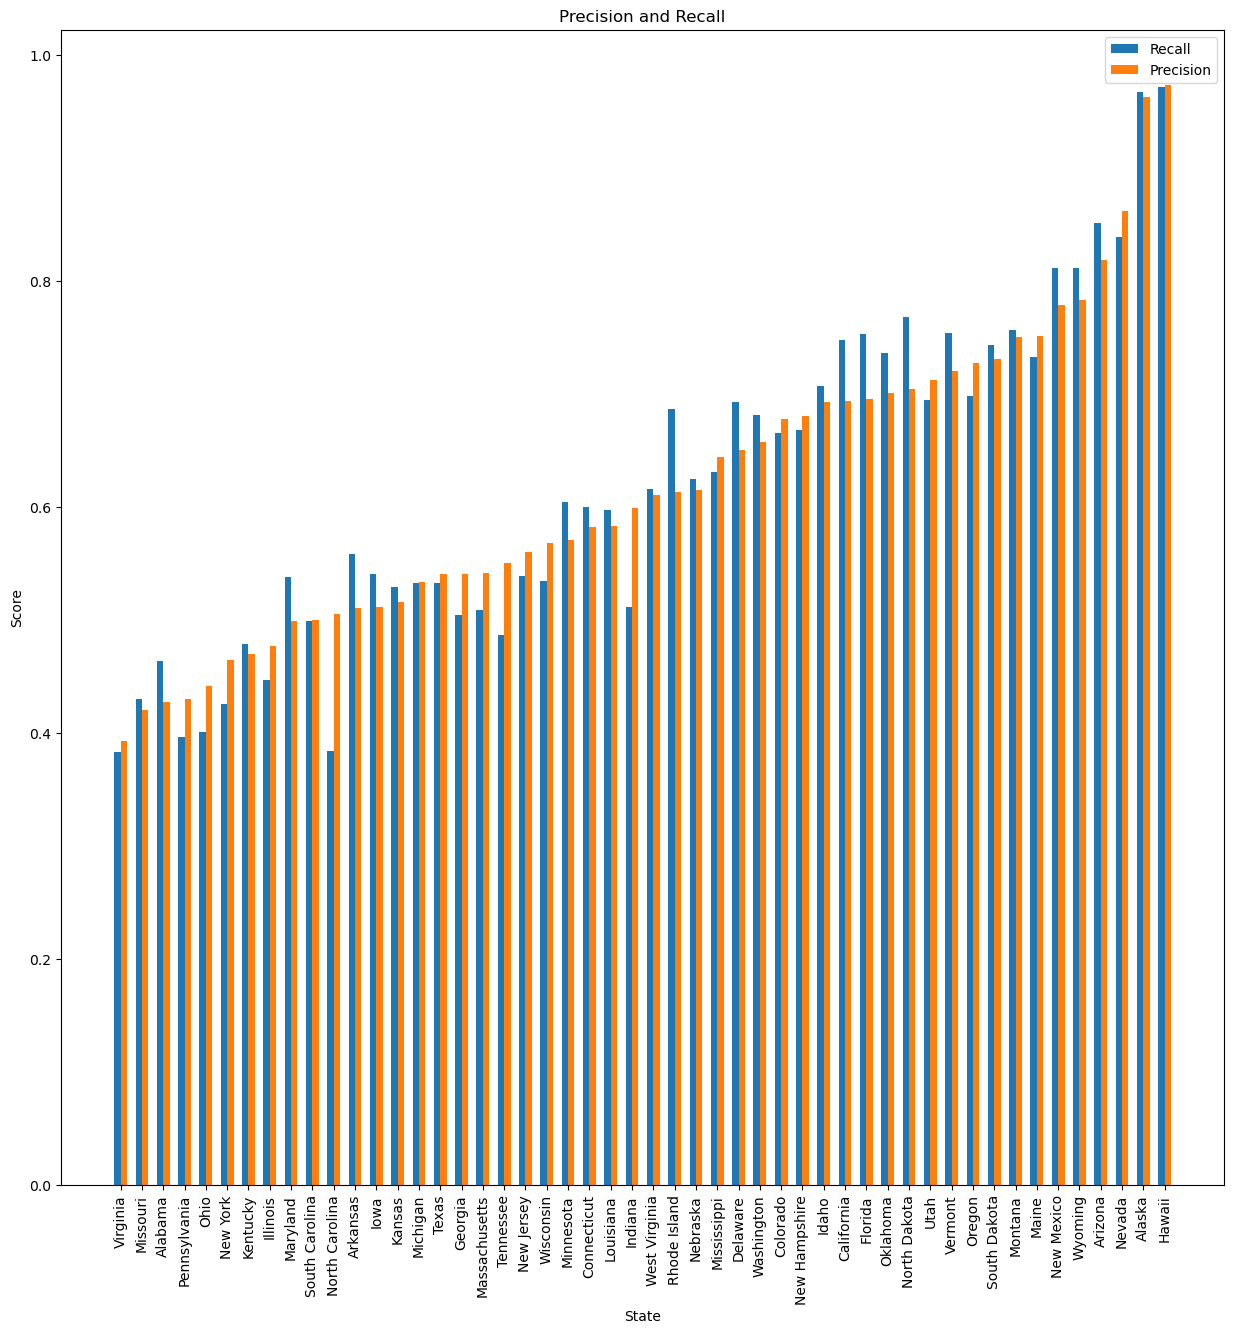

In [355]:
plot_class_precision_and_recall(cm, states)

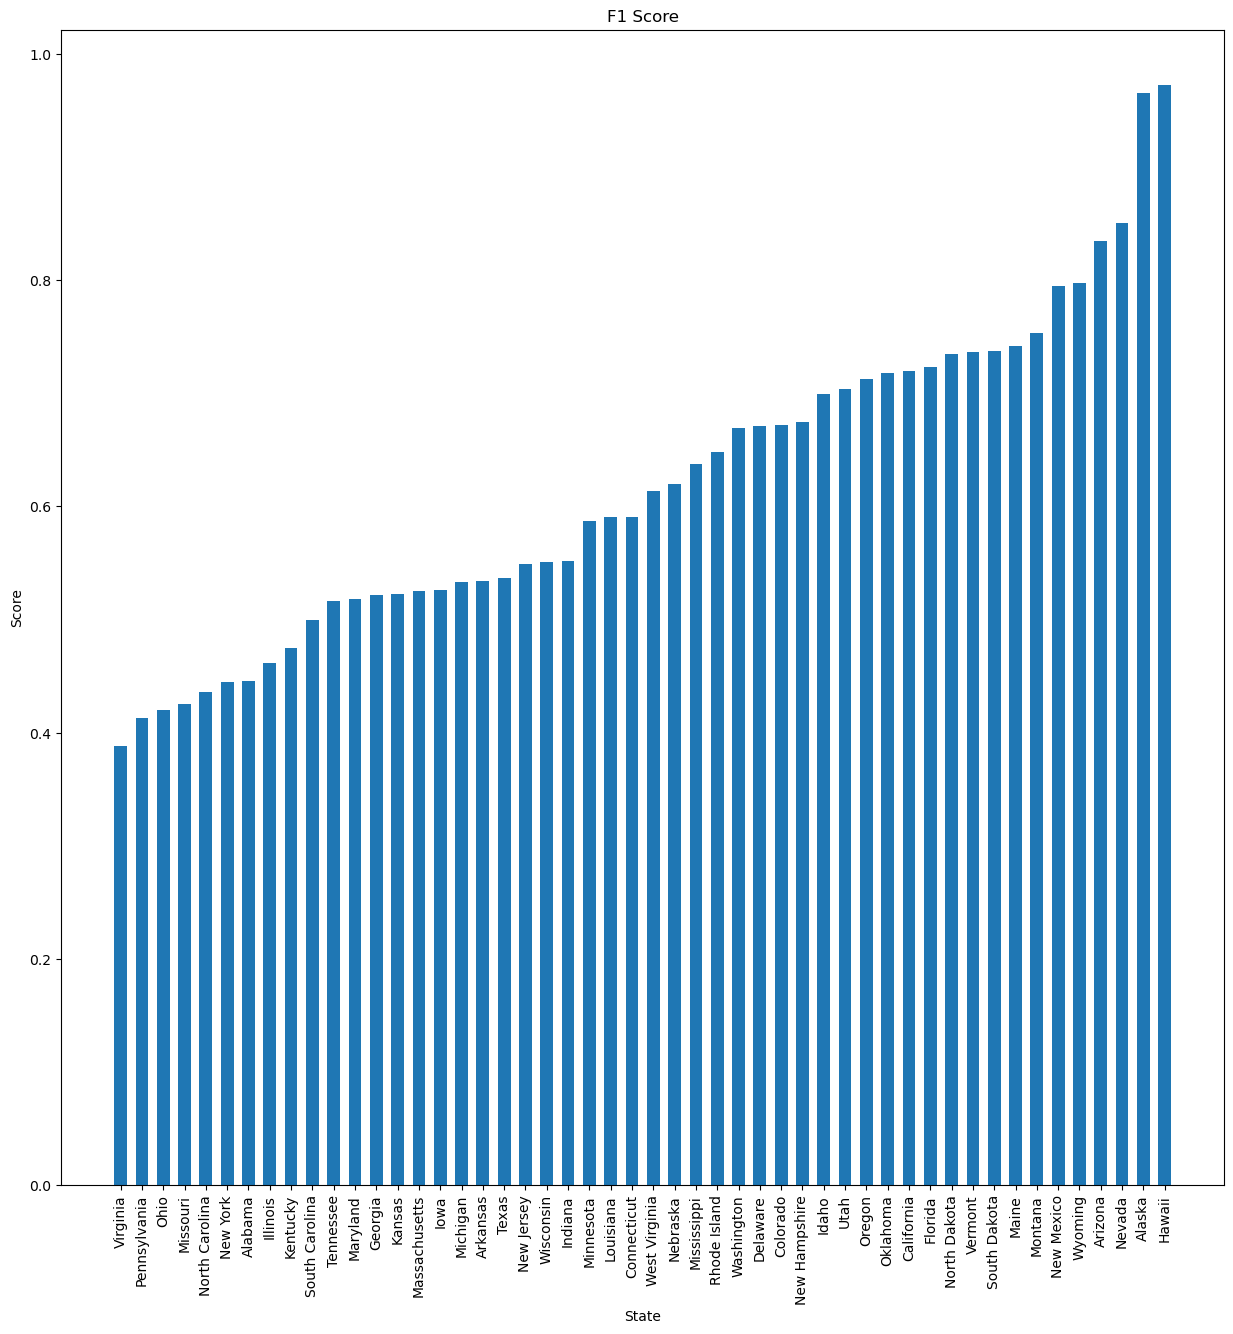

In [356]:
plot_class_f1(cm, states)

In [5]:
model = learn.model
model.eval()
target_layers = [model[0].model.blocks[-1].norm1]

NameError: name 'learn' is not defined

In [358]:
import cv2

In [359]:
def reshape_transform(tensor, height=7, width=7):
    result = tensor[:, 1:, :].reshape(tensor.size(0),
                                      height, width, tensor.size(2))

    # Bring the channels to the first dimension,
    # like in CNNs.
    result = result.transpose(2, 3).transpose(1, 2)
    
    # Flatten the spatial dimensions.
    return result

In [ ]:
prediction = learn.predict("data/val/0/00000000.jpg")[0]
# Get argmax of prediction
prediction = prediction.argmax(dim=-1)
# Get the model's prediction
print(learn.dls.vocab[prediction])

In [ ]:
    concept_outputs = torch.softmax(torch.from_numpy(concept_outputs), axis=-1).numpy()    
    concept_label_strings = [learn.dls.vocab[label] for label in concept_labels]

In [3]:
import timm
import cv2

c:\Users\18147\anaconda3\envs\RobustSecureDL\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [361]:
model = timm.create_model("vit_base_patch16_224", pretrained=True)
cam = GradCAM(model=model,
                            target_layers=target_layers,
                            use_cuda=True,
                            reshape_transform=reshape_transform)

In [4]:
model = learn.model
model.eval()
model = model.to(device)

NameError: name 'learn' is not defined

In [1]:
def reshape_transform(tensor, height=7, width=7):
    # err
    result = tensor[:, 1 :  , :].reshape(tensor.size(0),
        height, width, tensor.size(2))

    print("Shape after slicing:", tensor[:, 1:, :].shape)

    # Bring the channels to the first dimension,
    # like in CNNs.
    result = result.transpose(2, 3).transpose(1, 2)
    return result

# vit_model = timm.create_model("vit_small_patch32_224", pretrained=True)

rgb_img = cv2.imread("code/data/Alabama/2007_-NPWPMrYipeYcLsiZqKRyw_0.jpg", 1)[:, :, ::-1]
rgb_img = cv2.resize(rgb_img, (224, 224))
rgb_img = np.float32(rgb_img) / 255
input_tensor = preprocess_image(rgb_img, mean=[0.485, 0.456, 0.406], 
                                            std=[0.229, 0.224, 0.225])

cam = GradCAM(model=learn.model, target_layers=[learn.model[0].model.blocks[-1].norm1], 
              use_cuda=True, reshape_transform=reshape_transform)

grayscale_cam = cam(input_tensor=input_tensor,
                    targets=None,
                    eigen_smooth=True,
                    aug_smooth=True)

# Here grayscale_cam has only one image in the batch
grayscale_cam = grayscale_cam[0, :]

visualization = show_cam_on_image(rgb_img, grayscale_cam)


NameError: name 'cv2' is not defined

In [ ]:
learn.model[0].model.blocks[-1].norm1

LayerNorm((384,), eps=1e-06, elementwise_affine=True)

In [6]:
learn.loss_func

NameError: name 'learn' is not defined

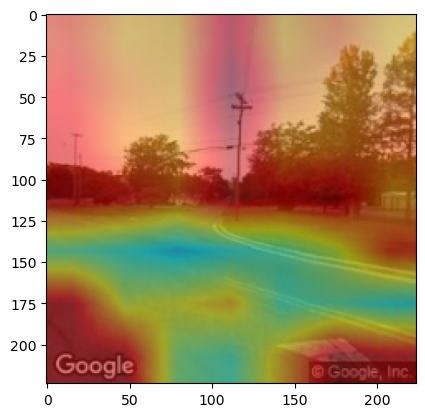

In [ ]:
# display(visualization)
plt.imshow(visualization)